# Board Game Review Prediction using Regression Models

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Read-the-csv-file-as-a-pandas-DataFrame" data-toc-modified-id="Read-the-csv-file-as-a-pandas-DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read the csv file as a pandas DataFrame</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Dropping-games-with-duplicate-id" data-toc-modified-id="Dropping-games-with-duplicate-id-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dropping games with duplicate id</a></span></li><li><span><a href="#Drop-non-numerical-columns-and-columns-not-related-to-the-boardgame-characteristics" data-toc-modified-id="Drop-non-numerical-columns-and-columns-not-related-to-the-boardgame-characteristics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Drop non-numerical columns and columns not related to the boardgame characteristics</a></span></li></ul></li><li><span><a href="#Preparing-the-data-for-machine-learning-models" data-toc-modified-id="Preparing-the-data-for-machine-learning-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing the data for machine learning models</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Example-points-and-model-predictions" data-toc-modified-id="Example-points-and-model-predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Example points and model predictions</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model evaluation</a></span></li></ul></div>

The board games dataset is taken from [ThaWeatherman](https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek).

The dataset contains information on 80000+ board games and their related characteristics. 

The purpose of this project is to predict the average rating of the board games based on features inclusing averange playing time, number of users who rated the game and so on.

This project will utilize Linear Regression and Random Forest Regression.

## Data preprocessing

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file as a pandas DataFrame

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


## Exploratory Data Analysis (EDA)

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

The `games.info()` function shows some missing values are present across some of the columns

In [5]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


Based on the `.describe()` method, we can see some values that might not be helpful in training our predictive model.

- the min year in the column `yearpublished` is -3500
- a lot of numerical columns have minimum value of `0`

### Dropping games with duplicate id

In [6]:
games.duplicated(subset='id').sort_values(ascending=False)

3327      True
2432      True
2406      True
2407      True
2408      True
2409      True
2410      True
2411      True
2412      True
2413      True
         ...  
54178    False
54179    False
54180    False
54181    False
54182    False
54183    False
54184    False
54185    False
54186    False
0        False
Length: 81312, dtype: bool

The `games.duplicated()` function shows that duplicate values are present in the `id` column.

The duplicated `id` will be removed from the DataFrame.

In [7]:
games.drop_duplicates(subset ="id", keep = 'first', inplace = True) 

The duplicated `id` are removed from the DataFrame using `.drop_duplicates()` function.

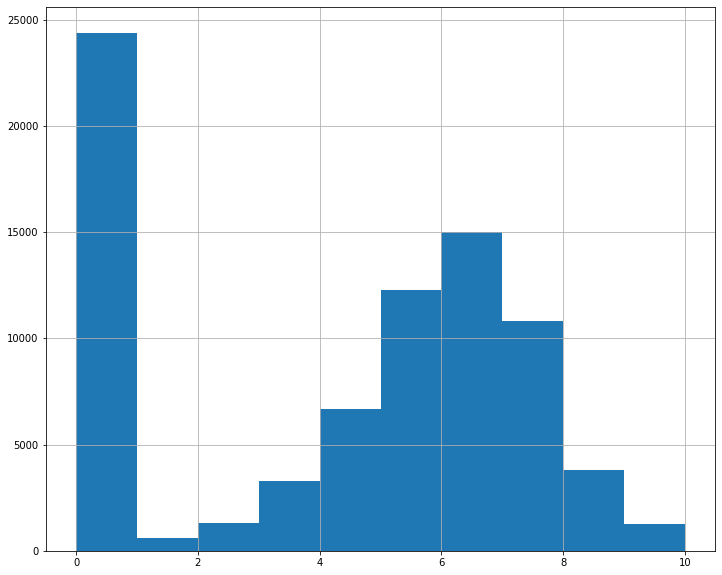

In [8]:
games['average_rating'].hist(figsize=(12, 10));

The histogram plot of the `average_rating` column shows a lot of 0. This may negatively effect our prediction model.

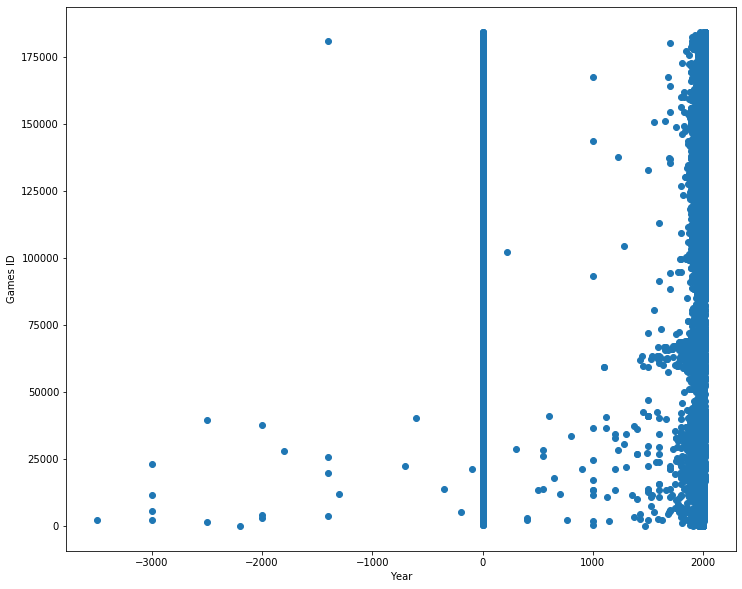

In [9]:
years = games.yearpublished
games_id = games.id

plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.scatter(years, games_id)
plt.xlabel("Year")
plt.ylabel("Games ID");

The scatter plot shows year values that goes below 0 and a lot of 0 values. For the purpose of this project, only games from year `1900` and after will be considered.

In [10]:
# removing rows having all 0s
games = games.dropna(how='all', axis=0)

In [11]:
games = games.loc[games['users_rated'] > 0]
games = games.loc[games['yearpublished'] > 1900]
games = games.loc[games['average_weight'] > 1]
games = games.loc[games['total_wishers'] > 0]
games = games.loc[games['minage'] > 0]
games = games.loc[games['playingtime'] > 0]

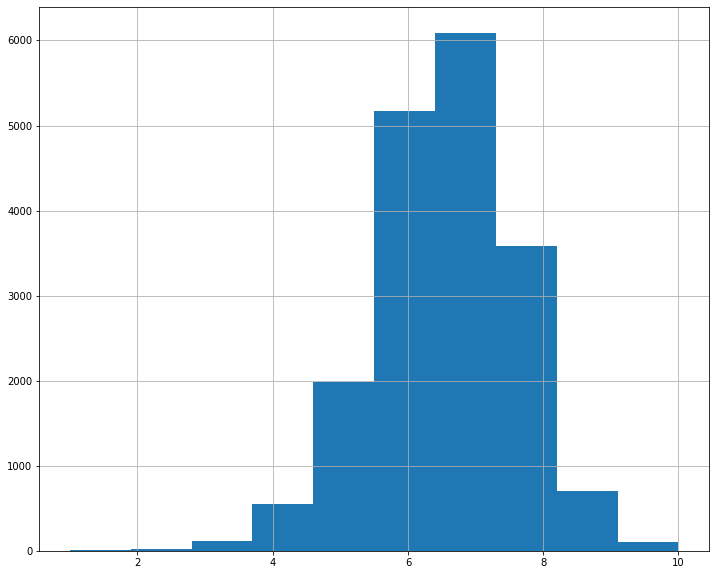

In [12]:
games['average_rating'].hist(figsize=(12, 10));

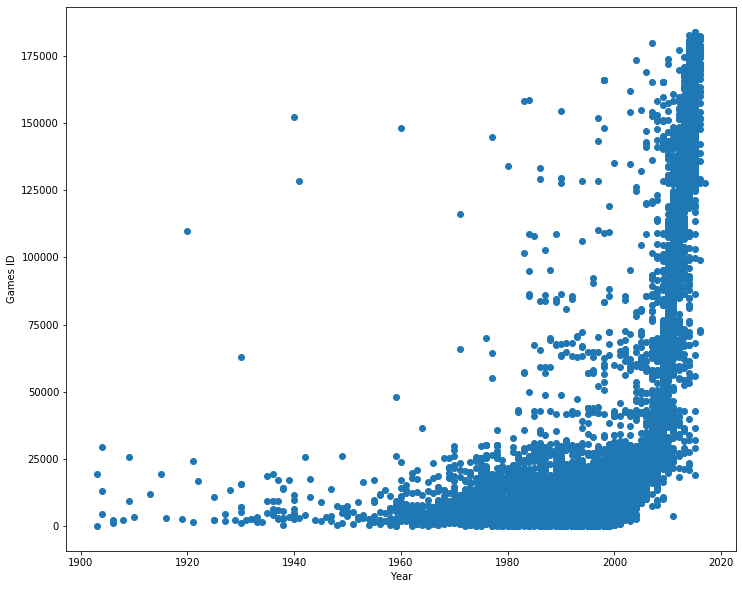

In [13]:
years = games.yearpublished
games_id = games.id

plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.scatter(years, games_id)
plt.xlabel("Year")
plt.ylabel("Games ID");

After cleaning the data, the year column makes much more sense.

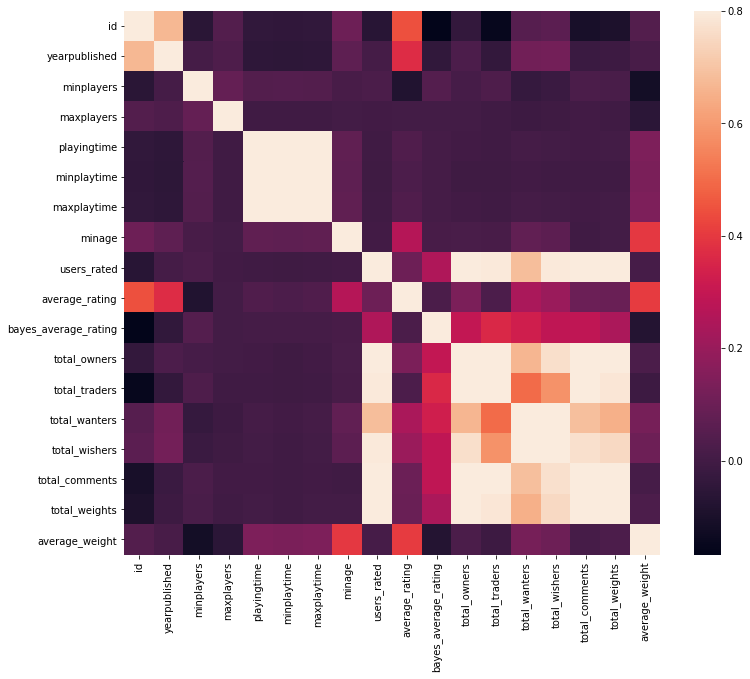

In [14]:
corrmat = games.corr()

sns.heatmap(corrmat, vmax=0.8)
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.show();

### Drop non-numerical columns and columns not related to the boardgame characteristics

In [15]:
games.drop(columns=['bayes_average_rating', 'type', 'name', 'id'], inplace=True)

## Preparing the data for machine learning models

Split the dataset in feature matrix and target array

In [16]:
X = games.drop(columns='average_rating')
y = games['average_rating']

X.shape, y.shape

((18346, 15), (18346,))

Split the dataset into train set and training set

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.35)

In [18]:
Xtrain.shape, Xtest.shape

ytrain.shape, ytest.shape

((11924, 15), (6422, 15))

((11924,), (6422,))

# Machine Learning

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

linreg = LinearRegression()

linreg.fit(Xtrain, ytrain)

linreg_predictions = linreg.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

In [21]:
random_forest.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
rf_predictions = random_forest.predict(Xtest)

## Feature Importance 

The `feature_importance_` method quantify how much each feature contributes to gain in performance in the nodes of the different trees.
Then, the feature importance is plotted in a bar chart.

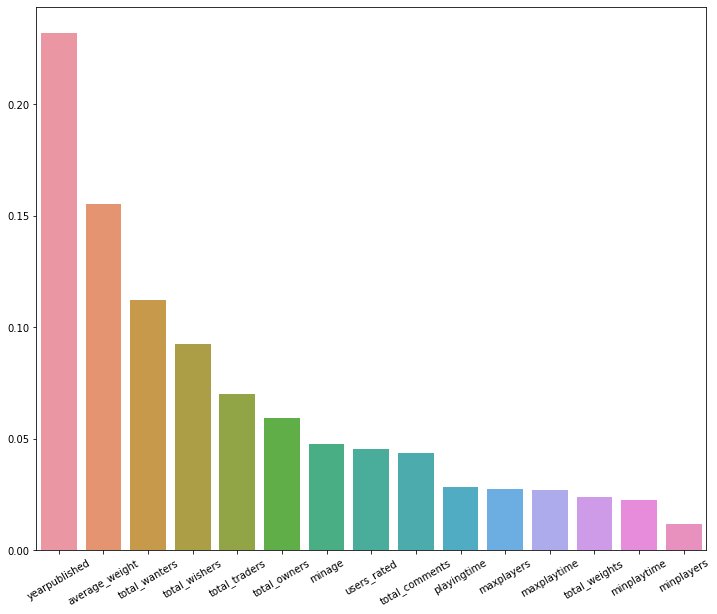

In [23]:
features = ['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight']

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, max_features=4, max_depth=12, n_jobs=-1)

forest.fit(X,y)
importances = forest.feature_importances_

feat_importances = sorted(list(zip(features, importances)), 
                          key=lambda x:x[1], reverse=True)

plt.rcParams['figure.figsize'] = (12.0, 10.0)

sns.barplot([a[0] for a in feat_importances], 
            [b[1] for b in feat_importances])

plt.xticks(rotation=30);

## Example points and model predictions

Some example actual values and the corresponding predictions by linear regression and random forest models are shown. 

In [24]:
for num in range(1,4):
    print("Actual value:", round(ytest.iloc[num],2))
    print("Linear Regression prediction:", round(linreg_predictions[num],2))
    print("Random Forest prediction:", round(rf_predictions[num],2))
    print()

Actual value: 6.18
Linear Regression prediction: 6.19
Random Forest prediction: 6.17

Actual value: 5.64
Linear Regression prediction: 6.31
Random Forest prediction: 5.43

Actual value: 7.7
Linear Regression prediction: 7.0
Random Forest prediction: 7.21



## Model evaluation 

In [25]:
linreg_eval = mean_squared_error(linreg_predictions, ytest)

rf_eval = mean_squared_error(rf_predictions, ytest)

percent_decrease = ((rf_eval - linreg_eval) / rf_eval) * 100

print("Linear Regression mean squared error:", round(linreg_eval,2))
print("Random Forest mean square error:", round(rf_eval,2))
print()
print("Random forest regression model decreases the mean square error of linear regression model by {:.2f}%.".format(percent_decrease))

Linear Regression mean squared error: 0.73
Random Forest mean square error: 0.51

Random forest regression model decreases the mean square error of linear regression model by -42.71%.
